In [2]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score # classification accuracy check
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
data = pd.read_csv(r"D:\project\Analytical_Projects\classification_Nasa\dataset\nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [5]:
data = data.drop_duplicates()
data = data.dropna(subset="Neo Reference ID")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [6]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [7]:
le= LabelEncoder()
data['Hazardous'] = le.fit_transform(data['Hazardous'])
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


In [8]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [9]:
data.corr(numeric_only=True)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Name,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Absolute Magnitude,0.602381,0.602381,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424


<Axes: >

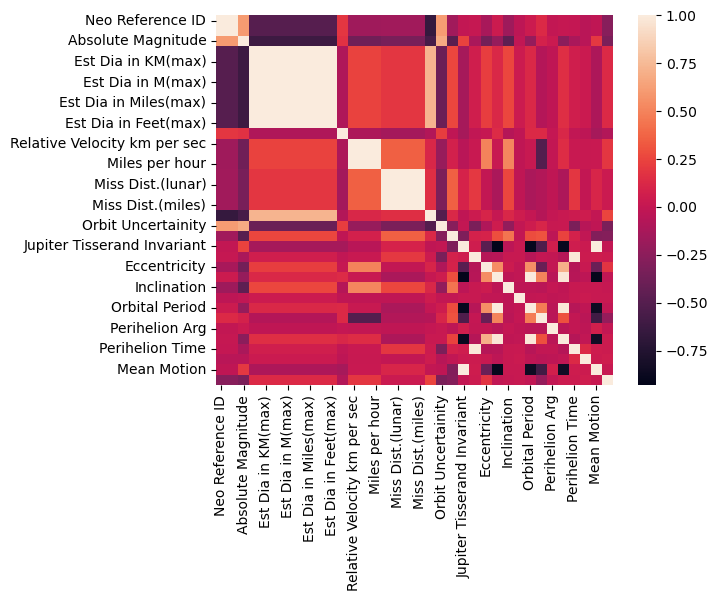

In [10]:
sns.heatmap(data.corr(numeric_only=True))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [13]:
data = data.drop(columns=['Equinox','Orbit Determination Date', 'Orbiting Body',  'Close Approach Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Epoch Date Close Approach     4687 non-null   int64  
 12  Relative Velocity km per sec  4687 non-null   float64
 13  Rel

In [14]:
#splitting x and y
y = data[['Hazardous']]
y.head()

,Hazardous
0,1
1,0
2,1
3,0
4,1


In [15]:
X = data.drop(columns='Hazardous')

X.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
log_reg_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
svm_model = SVC()
forest_model = RandomForestClassifier()

In [18]:
log_reg_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
forest_model.fit(X_train,y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7020\1329402991.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train,y_train)


RandomForestClassifier()

In [19]:
y_pred_1 = log_reg_model.predict(X_test)
y_pred_2 = tree_model.predict(X_test)
y_pred_3 = svm_model.predict(X_test)
y_pred_4 = forest_model.predict(X_test)

The accuracy score of the model is 0.8308457711442786.
The F1 score of the model is 0.0
......Confussion matrix......
[[1169    0]
 [ 238    0]]


<Axes: >

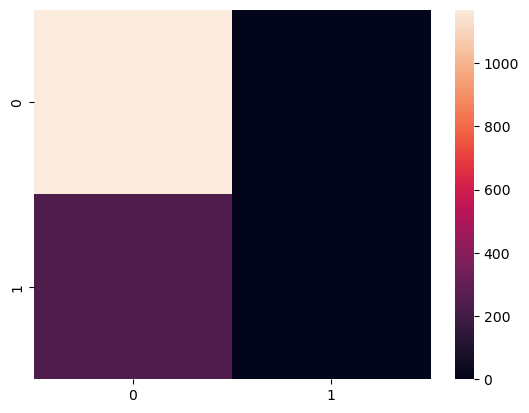

In [29]:
# Accuracy logistic regression 

accuracy = accuracy_score(y_test,y_pred_1)
cm = confusion_matrix(y_test,y_pred_1)
f1 = f1_score(y_test,y_pred_1)

print(f"The accuracy score of the model is {accuracy}.")


print(f"The F1 score of the model is {f1}")

print("......Confussion matrix......")
print(cm)
sns.heatmap(cm)

The accuracy score of the model is 0.9950248756218906.
The F1 score of the model is 0.9853249475890986
......Confussion matrix......
[[1165    4]
 [   3  235]]


<Axes: >

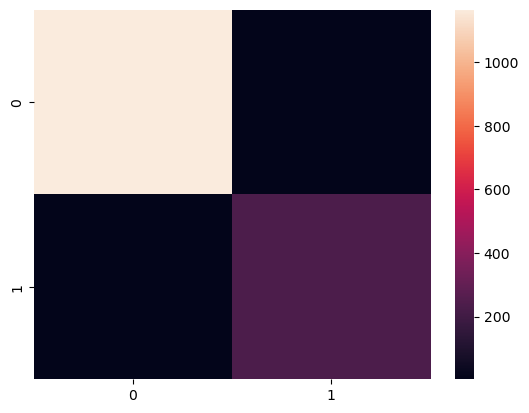

In [28]:
# Accuracy  Descission tree classifier 

accuracy = accuracy_score(y_test,y_pred_2)
cm = confusion_matrix(y_test,y_pred_2)
f1 = f1_score(y_test,y_pred_2)

print(f"The accuracy score of the model is {accuracy}.")


print(f"The F1 score of the model is {f1}")

print("......Confussion matrix......")
print(cm)
sns.heatmap(cm)

The accuracy score of the model is 0.8308457711442786.
The F1 score of the model is 0.0
......Confussion matrix......
[[1169    0]
 [ 238    0]]


<Axes: >

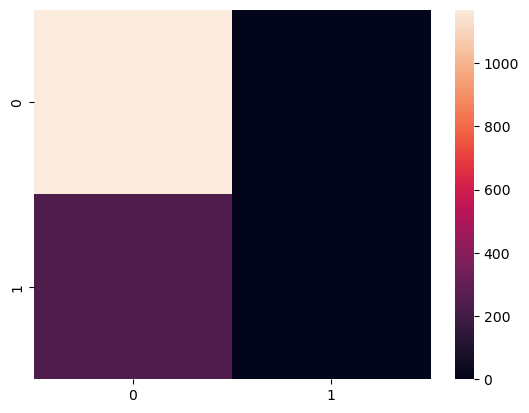

In [26]:
# Accuracy  SVM classifier 

accuracy = accuracy_score(y_test,y_pred_3)
cm = confusion_matrix(y_test,y_pred_3)
f1 = f1_score(y_test,y_pred_3)

print(f"The accuracy score of the model is {accuracy}.")


print(f"The F1 score of the model is {f1}")

print("......Confussion matrix......")
print(cm)

sns.heatmap(cm)

The accuracy score of the model is 0.9964463397299218.
The F1 score of the model is 0.9894736842105263
......Confussion matrix......
[[1167    2]
 [   3  235]]


<Axes: >

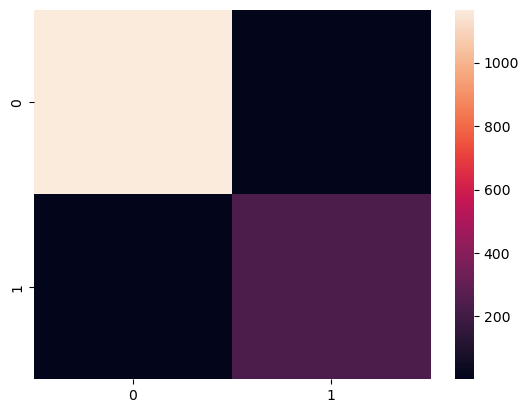

In [27]:
# Accuracy  Random forest classifier 

accuracy = accuracy_score(y_test,y_pred_4)
cm = confusion_matrix(y_test,y_pred_4)
f1 = f1_score(y_test,y_pred_4)

print(f"The accuracy score of the model is {accuracy}.")


print(f"The F1 score of the model is {f1}")

print("......Confussion matrix......")
print(cm)
sns.heatmap(cm)